In [30]:
%%bash
pip install aplpy 
pip install https://github.com/ericmandel/pyds9/archive/master.zip

In [31]:
%%bash
curl -O https://astropy.stsci.edu/data/galactic_center/gc_bolocam_gps.fits
curl -O https://astropy.stsci.edu/data/galactic_center/gc_2mass_k.fits

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1605k  100 1605k    0     0   739k      0  0:00:02  0:00:02 --:--:--  740k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1020k  100 1020k    0     0   435k      0  0:00:02  0:00:02 --:--:--  435k


In [32]:
%matplotlib inline
import pylab as pl

In [33]:
from astropy.io import fits

In [34]:
stellardata = fits.getdata('gc_2mass_k.fits')

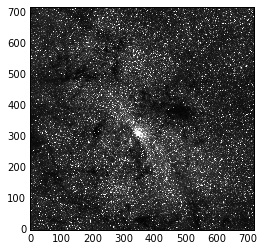

In [35]:
pl.imshow(stellardata, cmap=pl.cm.gray, vmax=1000)

In [36]:
dustdata = fits.getdata('gc_bolocam_gps.fits')

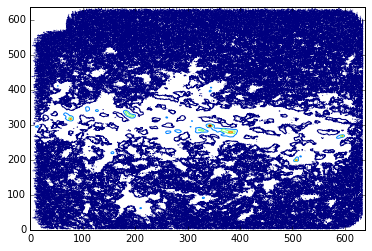

In [37]:
pl.contour(dustdata)

(array([  1.00000000e+00,   3.00000000e+00,   4.00000000e+00,
          4.00000000e+00,   3.10000000e+01,   1.46000000e+02,
          1.27700000e+03,   4.25890000e+04,   2.89834000e+05,
          2.97930000e+04,   1.11970000e+04,   5.02900000e+03,
          2.38000000e+03,   1.46500000e+03,   9.86000000e+02,
          7.11000000e+02,   4.68000000e+02,   3.19000000e+02,
          2.79000000e+02,   2.58000000e+02,   1.84000000e+02,
          1.81000000e+02,   1.33000000e+02,   1.02000000e+02,
          8.90000000e+01,   8.20000000e+01,   6.90000000e+01,
          6.10000000e+01,   5.10000000e+01,   5.00000000e+01,
          3.50000000e+01,   1.90000000e+01,   1.80000000e+01,
          1.80000000e+01,   7.00000000e+00,   9.00000000e+00,
          7.00000000e+00,   1.10000000e+01,   2.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
        

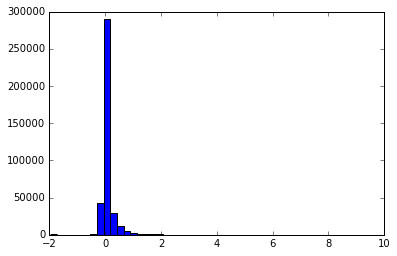

In [38]:
# pl.hist(dustdata.flatten(), bins=50)
pl.hist(dustdata[np.isfinite(dustdata)], bins=50)

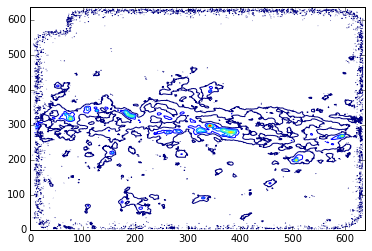

In [39]:
pl.contour(dustdata, levels=np.linspace(0.2,10,10))

An example of why overplotting directly doesn't work:

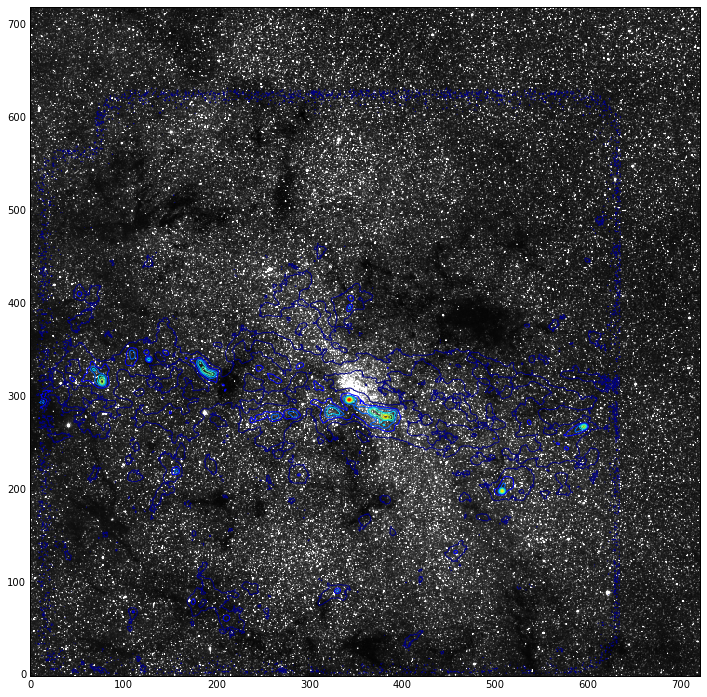

In [40]:
pl.figure(figsize=(12,12))
pl.imshow(stellardata, cmap=pl.cm.gray, vmax=1000)
pl.contour(dustdata, levels=np.linspace(0.2,10,10))

In [41]:
import aplpy

/Users/adam/anaconda/envs/esopython2016/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmin to  4.221e+02 [aplpy.core]


invalid alternate code, keyword resembles LONPOLEa but isn't. [astropy.wcs.wcs]
invalid alternate code, keyword resembles LATPOLEa but isn't. [astropy.wcs.wcs]


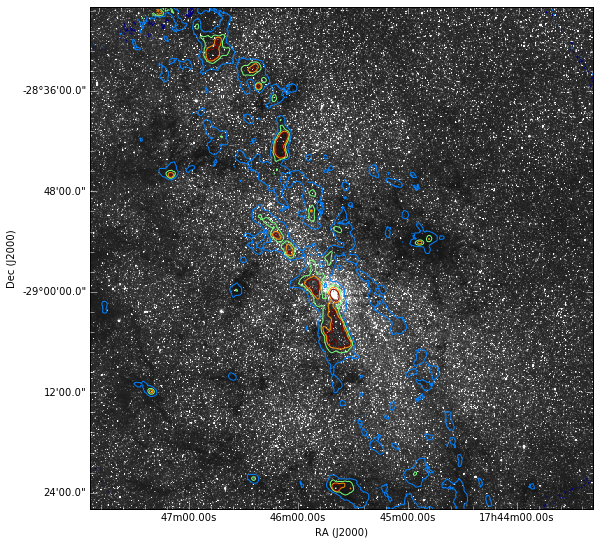

In [42]:
F = aplpy.FITSFigure('gc_2mass_k.fits')
F.show_grayscale(vmax=1000)
F.show_contour('gc_bolocam_gps.fits', convention='calabretta')

In [43]:
import pyds9

In [47]:
DD = pyds9.DS9('mine')

In [48]:
DD.set('frame 1')
DD.set_pyfits(fits.open('gc_2mass_k.fits'))

1

In [49]:
DD.set('frame lock wcs')
DD.set('frame 2')
DD.set_pyfits(fits.open('gc_bolocam_gps.fits'))

1

In [50]:
DD.set('blink')

1

## Exercises ##

1. Using the ``gc_2mass_k.fits`` image & aplpy, make a finder chart of the galactic center

 - add a scalebar
 - make nicer contours
 - adjust the scaling
 - add a colorbar
 - Recenter & zoom on a particular object